<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/hugging_face/huggingface_transefer_learning_clasification_beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt

Hojas de frijoles

In [ ]:
dbean = load_dataset("beans")

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dbean

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [ ]:
# type
type(dbean)

datasets.dataset_dict.DatasetDict

In [ ]:
# Valor de un registro
dbean['train'][0]

{'image_file_path': '/root/.cache/huggingface/datasets/downloads/extracted/b0a21163f78769a2cf11f58dfc767fb458fc7cea5c05dccc0144a2c0f0bc1292/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7F98429743A0>,
 'labels': 0}

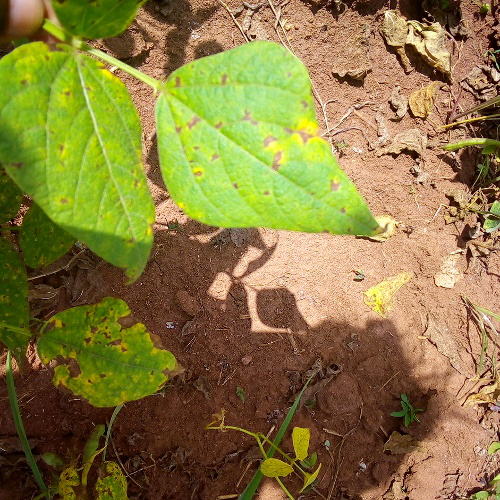

In [ ]:
dbean['train'][0]['image']

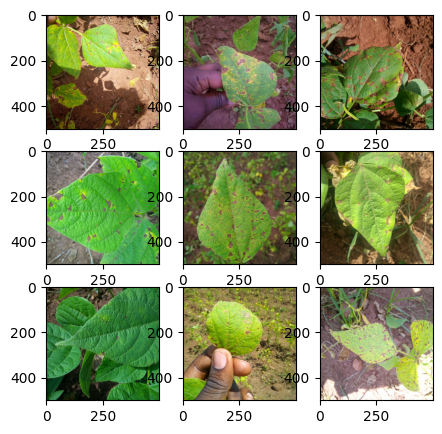

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), nrows=3, ncols=3)
for a, i in zip( ax.flat, range(9)):
  imgg = dbean['train'][i]['image']
  a.imshow(imgg)


In [ ]:
labels = dbean['train'].features['labels']
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

There are three category

In [ ]:
labels.int2str

<bound method ClassLabel.int2str of ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)>

Etiquetas

In [ ]:
ex = dbean['train'][1]
ex

{'image_file_path': '/root/.cache/huggingface/datasets/downloads/extracted/b0a21163f78769a2cf11f58dfc767fb458fc7cea5c05dccc0144a2c0f0bc1292/train/angular_leaf_spot/angular_leaf_spot_train.1.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7F9884EC9270>,
 'labels': 0}

In [ ]:
labels.int2str(ex['labels'])

'angular_leaf_spot'

Cargando el VIT Feature Extractor

In [ ]:
from transformers import ViTFeatureExtractor

In [ ]:
# modelo preentrenado para extrer caracteristicas
repo_id = 'google/vit-base-patch16-224-in21k'

# ViTFeatureExtractor requiere un modelo para tal proposito
feature_extractor = ViTFeatureExtractor.from_pretrained(repo_id)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
print(feature_extractor)

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



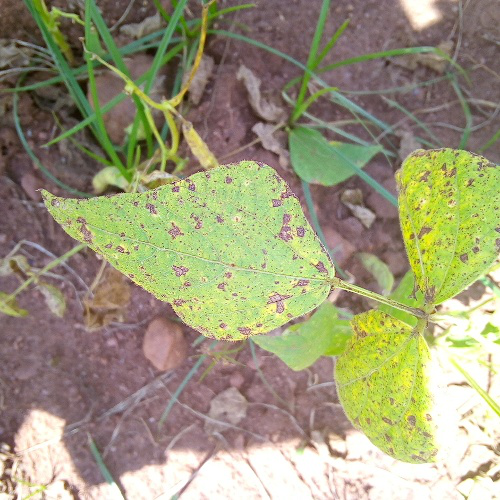

In [ ]:
img = dbean['train'][8]['image']
img

In [ ]:
# Retorne tensores de python | Forma predeterminada retorna arrays de numpy
feature_extractor(img, return_tensors='pt')

{'pixel_values': tensor([[[[-0.1137, -0.1922, -0.1922,  ...,  0.0118,  0.0510,  0.0667],
          [-0.0902, -0.2235, -0.2549,  ..., -0.0039,  0.0196, -0.0353],
          [-0.1451, -0.2314, -0.2784,  ...,  0.0353,  0.0196, -0.0510],
          ...,
          [ 0.9451,  0.9608,  0.8745,  ...,  0.9451,  0.9922,  0.9922],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.7412,  0.9451,  0.9922],
          [ 1.0000,  0.9843,  0.9765,  ...,  0.9137,  0.9686,  0.9922]],

         [[-0.3333, -0.3961, -0.3725,  ..., -0.1294, -0.0745, -0.0510],
          [-0.3020, -0.4196, -0.4353,  ..., -0.1451, -0.1216, -0.1686],
          [-0.3333, -0.4196, -0.4510,  ..., -0.0980, -0.1216, -0.1922],
          ...,
          [ 0.9059,  0.9294,  0.8118,  ...,  0.9137,  0.9843,  1.0000],
          [ 0.9922,  0.9922,  0.9686,  ...,  0.6471,  0.9294,  0.9922],
          [ 1.0000,  0.9765,  0.9451,  ...,  0.8667,  0.9608,  0.9922]],

         [[-0.4275, -0.4980, -0.4824,  ..., -0.1373, -0.0902, -0.0745],
          [-0

In [ ]:
feature_extractor(img, return_tensors='pt').keys()

dict_keys(['pixel_values'])

forma de tensores a imagenes

In [ ]:
feature_extractor(img, return_tensors = 'pt')['pixel_values'].shape

torch.Size([1, 3, 224, 224])

# Procesando el dataset
---

In [ ]:
def process_example(example):
  inputs = feature_extractor(example['image'], return_tensors="pt")
  inputs['labels'] = example['labels']
  return inputs

In [ ]:
process_example(dbean['train'][10])

{'pixel_values': tensor([[[[ 0.0275, -0.0196,  0.0196,  ...,  0.0353,  0.2157, -0.0039],
          [-0.0275,  0.0980, -0.0275,  ...,  0.2000,  0.3569,  0.1922],
          [-0.0902,  0.1294,  0.0353,  ...,  0.1686,  0.3333,  0.3098],
          ...,
          [-0.0196, -0.2784, -0.4353,  ..., -0.2863, -0.1922, -0.3882],
          [ 0.2392, -0.1686, -0.3804,  ..., -0.1294, -0.1608, -0.3647],
          [ 0.3176, -0.0275, -0.3255,  ..., -0.2392, -0.1686, -0.3412]],

         [[-0.3412, -0.3569, -0.2627,  ..., -0.3176, -0.1373, -0.3412],
          [-0.4039, -0.2627, -0.3333,  ..., -0.1373, -0.0118, -0.1843],
          [-0.4745, -0.2314, -0.2941,  ..., -0.2000, -0.0275, -0.0510],
          ...,
          [ 0.2000,  0.0431, -0.0118,  ..., -0.5373, -0.3569, -0.5216],
          [ 0.3333,  0.0745,  0.0118,  ..., -0.4039, -0.3490, -0.4902],
          [ 0.3647,  0.1922,  0.0588,  ..., -0.5137, -0.3647, -0.4667]],

         [[-0.4980, -0.5294, -0.4745,  ..., -0.4353, -0.2784, -0.4745],
          [-0

a función map y aplicar esto a todos los ejemplos a la vez. Pero esto puede ser muy lento, especialmente si usa un dataset más grande.

Entonces podemos aplicar una transformación al dataset. Las transformaciones solo se aplican a los ejemplos a medida que los indexamos.

Sin embargo, primero deberá actualizar la última función para aceptar un batch posiblemente con más de una imagen, ya que eso es lo que espera ds.with_transform.

In [ ]:
# Lotes o batch
def transform(example_batch):
  inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')
  inputs['labels'] = example_batch['labels']
  return inputs

with_transform es similar a un apply en pandas

In [ ]:
prepared_ds = dbean.with_transform(transform)

In [ ]:
prepared_ds.keys()

dict_keys(['train', 'validation', 'test'])

In [ ]:
prepared_ds['train'][0:2].keys()

dict_keys(['pixel_values', 'labels'])

In [ ]:
prepared_ds['train'][0:2] # Formato de entrada del modelo

{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1922, -0.2549],
          [-0.6078, -0.6000, -0.5843,  ..., -0.0353, -0.0196, -0.2706],
          [-0.6314, -0.6314, -0.6157,  ..., -0.2392, -0.3647, -0.2314],
          ...,
          [-0.5373, -0.5529, -0.5765,  ..., -0.0745, -0.0431, -0.0980],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3176,  0.1608,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2784,  0.1451,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3569, -0.3176, -0.5608],
          [-0.7490, -0.7490, -0.7647,  ..., -0.5373, -0.6627, -0.5373],
          ...,
          [-0.7725, -0.7882, -0.8196,  ..., -0.2314, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1843,  0.3176,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0745,  0.2863,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3647, -0.7333],
          [-0

# Data Collector
---

Se creara una función que permita determinar los lotes.

In [ ]:
import torch

stack permite pegar tensores

In [ ]:
def collate_fn(batch):
  return {
      "pixel_values": torch.stack([x['pixel_values'] for x in batch]),
      "labels": torch.tensor([x["labels"] for x in batch])
  }


Definamos una metrica

In [ ]:
import numpy as np
from datasets import load_metric

In [ ]:
metric = load_metric("accuracy")

<ipython-input-30-21f3ecd7ee32>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
def computa_metrics(prediction):
  # Indica la probabilidad maxima
  a = metric.compute(predictions=np.argmax(prediction.predictions, axis=1),
                        references=prediction.label_ids),
  return a


configurar el trainer

In [ ]:
from transformers import ViTForImageClassification

In [ ]:
labels = dbean['train'].features['labels'].names

labels

['angular_leaf_spot', 'bean_rust', 'healthy']

In [ ]:
model = ViTForImageClassification.from_pretrained(
    # id del modelo
    repo_id,
    # Numero de etiquetas
    num_labels = len(labels),
    id2label = {str(i): c for i, c in enumerate(labels)},
    label2id = {c: str(i) for i, c in enumerate(labels)}
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Entranando la ultima capa del modelo

In [ ]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install accelerate -U

In [ ]:
#!accelerate env

In [ ]:
#from accelerate import Accelerator
#accelerator = Accelerator()
#device = accelerator.device

In [ ]:
from transformers import TrainingArguments

In [ ]:
from transformers import Trainer

In [ ]:
training_args = TrainingArguments(
    output_dir="./mega_modelo",
    evaluation_strategy="steps",
    num_train_epochs=4,
    learning_rate=2e-4,
    push_to_hub=False,
    remove_unused_columns=False,
    load_best_model_at_end=True,
)

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = collate_fn,
    compute_metrics = computa_metrics,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_ds['validation'],
    tokenizer=feature_extractor
)

In [ ]:
trainer

# entrenamiento

In [ ]:
train_results = trainer.train()

In [ ]:
trainer.save_model()

In [ ]:
trainer.log_metrics("train", train_results.metrics)

In [ ]:
trainer.save_metrics("train", train_results.metrics)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1645 in train                    │
│                                                                                                  │
│   1642 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1643 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1644 │   │   )                                                                                 │
│ ❱ 1645 │   │   return inner_training_loop(                                                       │
│   1646 │   │   │   args=args,                                                                    │
│   1647 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1648 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2020 in _inner_training_loop     │
│                                                                                                  │
│   2017 │   │   │   │   │   self.state.epoch = epoch + (step + 1 + steps_skipped) / steps_in_epo  │
│   2018 │   │   │   │   │   self.control = self.callback_handler.on_step_end(args, self.state, s  │
│   2019 │   │   │   │   │                                                                         │
│ ❱ 2020 │   │   │   │   │   self._maybe_log_save_evaluate(tr_loss, model, trial, epoch, ignore_k  │
│   2021 │   │   │   │   else:                                                                     │
│   2022 │   │   │   │   │   self.control = self.callback_handler.on_substep_end(args, self.state  │
│   2023                                                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2321 in _maybe_log_save_evaluate │
│                                                                                                  │
│   2318 │   │   │   │   │   )                                                                     │
│   2319 │   │   │   │   │   metrics.update(dataset_metrics)                                       │
│   2320 │   │   │   else:                                                                         │
│ ❱ 2321 │   │   │   │   metrics = self.evaluate(ignore_keys=ignore_keys_for_eval)                 │
│   2322 │   │   │   self._report_to_hp_search(trial, self.state.global_step, metrics)             │
│   2323 │   │   │                                                                                 │
│   2324 │   │   │   # Run delayed LR scheduler now that metrics are populated                     │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3053 in evaluate                 │
│                                                                                                  │
│   3050 │   │   start_time = time.time()                                                          │
│   3051 │   │                                                                                     │
│   3052 │   │   eval_loop = self.prediction_loop if self.args.use_legacy_prediction_loop else se  │
│ ❱ 3053 │   │   output = eval_loop(                                                               │
│   3054 │   │   │   eval_dataloader,                        